In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.decomposition import PCA


from sklearn.kernel_ridge import KernelRidge

from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('C:/Users/Nandhini Giridharan/Downloads/train.csv')
df.head()
print("Dataset size:",df.shape)
print("\nData columns:", list(df.columns))
print("\nDatatype:\n",df.dtypes)
x=  df.select_dtypes([np.number]) 


Dataset size: (1460, 81)

Data columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPor

In [3]:
Y=df['SalePrice']
X=df.drop(['SalePrice'],axis=1)
X=X.select_dtypes(np.number)

#Missing value imputation
for col in X.columns:
    X[col].fillna(X[col].median(axis=0),inplace=True)


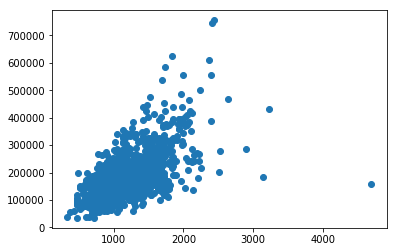

Id  :  -0.021916719443431106  , -0.01854562453597749
MSSubClass  :  -0.08428413512659517  , 0.007192252911733475
LotFrontage  :  0.33477085313975996  , 0.37558979220878164
LotArea  :  0.2638433538714056  , 0.45646058339121154
OverallQual  :  0.7909816005838051  , 0.8098285862017292
OverallCond  :  -0.077855894048678  , -0.12932494660061317
YearBuilt  :  0.5228973328794969  , 0.6526815462850586
YearRemodAdd  :  0.5071009671113862  , 0.5711589780582342
MasVnrArea  :  0.4726144990045737  , 0.41590612670677174
BsmtFinSF1  :  0.3864198062421533  , 0.3018712035800953
BsmtFinSF2  :  -0.01137812145021514  , -0.038806132045894184
BsmtUnfSF  :  0.2144791055469689  , 0.18519662942076204
TotalBsmtSF  :  0.6135805515591953  , 0.6027254448924096
1stFlrSF  :  0.6058521846919146  , 0.5754078354212824
2ndFlrSF  :  0.3193338028320678  , 0.29359798822238187
LowQualFinSF  :  -0.025606130000679534  , -0.06771915407896568
GrLivArea  :  0.708624477612652  , 0.7313095834659141
BsmtFullBath  :  0.2271222331314

In [4]:
plt.scatter(df['1stFlrSF'],df['SalePrice'])
plt.show()
s=0
r=0
useful_col=[]
for col in X.columns:
    corr, _ = pearsonr(Y,X[col])
    corr1,_= spearmanr(Y,X[col])
    if (abs(corr1) > abs(corr)): s+=1
    print(col," : ",corr," ,", corr1)
    if abs(corr1)>.2:
        useful_col.append(col)
print(useful_col)
print(s," ",r)

In [5]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2)
scalar=preprocessing.StandardScaler().fit(X)
X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

#Random Forest Regression
r_model=RandomForestRegressor(random_state=1,n_estimators=1000)
r_model.fit(X_train_scaled,y_train)
y_hat=r_model.predict(X_test_scaled)

print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))

print("R squared",r2_score(y_test,y_hat))
ft=r_model.feature_importances_
#print(ft)

#Linear Regression
r_model=LinearRegression()
r_model.fit(X_train_scaled,y_train)
y_hat=r_model.predict(X_test_scaled)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))
i=0
#f=pd.DataFrame(zip([X.columns,x]),columns=)

#for y in X.columns:
#    print(y,x[i])
#    i+=1
x= list(np.round(r_model.coef_,2))
y=pd.DataFrame(list(zip(X.columns,x)),columns=["Column names","importance"])
#print(y)
print(y.sort_values(by='importance'))

#Extreme Gradient Boosting
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train_scaled,y_train)
y_hat = xgb.predict(X_test_scaled)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


Root mean squared error 24647.42217425877
R squared 0.8782753468261183
Root mean squared error 27998.093940391747
R squared 0.8429302796268192
     Column names    importance
14       2ndFlrSF -7.558249e+16
13       1stFlrSF -6.693554e+16
12    TotalBsmtSF -4.623019e+16
15   LowQualFinSF -8.418819e+15
21   BedroomAbvGr -8.250780e+03
1      MSSubClass -8.105740e+03
22   KitchenAbvGr -2.622470e+03
2     LotFrontage -1.720060e+03
27     GarageArea -1.528130e+03
36         YrSold -1.200000e+03
29    OpenPorchSF -7.004600e+02
20       HalfBath -5.628700e+02
0              Id -4.463500e+02
33       PoolArea -3.327500e+02
34        MiscVal -2.586700e+02
35         MoSold -2.199500e+02
31      3SsnPorch  9.111000e+01
30  EnclosedPorch  1.028950e+03
18   BsmtHalfBath  1.200280e+03
7    YearRemodAdd  1.979830e+03
19       FullBath  2.713940e+03
28     WoodDeckSF  2.915110e+03
32    ScreenPorch  3.143590e+03
24     Fireplaces  3.159830e+03
25    GarageYrBlt  3.500400e+03
3         LotArea  3.7454

C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Root mean squared error 23619.51234596703
R squared 0.8882165803030841


In [6]:
#Iteration 2
#Onehot Encoding categorical variables
Y=df['SalePrice']
cat_columns=list((df.select_dtypes([object]).columns))
X1 = pd.get_dummies(df, prefix_sep="_",columns=cat_columns)
X=X1.drop(['SalePrice'],axis=1)
X=X.select_dtypes([np.number])
for col in X.columns:
    X[col].fillna(X[col].median(axis=0),inplace=True)

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2)
scalar=preprocessing.StandardScaler().fit(X_train)

X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

#Random Forest Model
r_model=RandomForestRegressor(random_state=1,n_estimators=1000)
r_model.fit(X_train_scaled,y_train)
y_hat=r_model.predict(X_test_scaled)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))

#Linear Model
r_model=LinearRegression()
r_model.fit(X_train_scaled,y_train)
y_hat=r_model.predict(X_test_scaled)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))

#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
xgb.fit(X_train_scaled,y_train)
y_hat = xgb.predict(X_test_scaled)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))

#Neural Network

regressor = MLPRegressor(hidden_layer_sizes = (100, 75, 50, 25), activation = 'relu', solver = 'sgd', learning_rate = 'adaptive', alpha = .00001, random_state = 1)
regressor.fit(X_train_scaled, y_train)
print(regressor.loss_)

y_hat = regressor.predict(X_test_scaled)

print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))



C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


Root mean squared error 30468.649783507262
R squared 0.8361458437871084
Root mean squared error 8290750345644629.0
R squared -1.2132176488766506e+22
[12:03:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Root mean squared error 31759.89366632785
R squared 0.8219634690333895
5.02590696104666e+29
Root mean squared error 596801222.1825435
R squared -62865220.7407611


In [7]:

#Iteration 3
#Onehot Encoding categorical variables. Checking CV
Y=df['SalePrice']
cat_columns=list((df.select_dtypes([object]).columns))
X1 = pd.get_dummies(df, prefix_sep="_",columns=cat_columns)
X=X1.drop(['SalePrice'],axis=1)
X=X.select_dtypes([np.number])
for col in X.columns:
    X[col].fillna(X[col].median(axis=0),inplace=True)

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2)
scalar=preprocessing.StandardScaler().fit(X_train)

X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

#Random Forest Model
r_model=RandomForestRegressor(random_state=1,n_estimators=1000)
y_hat = cross_val_predict(r_model, X, Y, cv=5)
print("Random Forest Root mean squared error",np.sqrt(mean_squared_error(y_hat,Y)))
print("Random Forest R squared",r2_score(Y,y_hat))

r_model=LinearRegression()
y_hat = cross_val_predict(r_model, X, Y, cv=5)
print("LR Root mean squared error",np.sqrt(mean_squared_error(y_hat,Y)))
print("LR R squared",r2_score(Y,y_hat))

#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
y_hat = cross_val_predict(xgb, X, Y, cv=5)
print("XGB Root mean squared error",np.sqrt(mean_squared_error(y_hat,Y)))
print("XGB R squared",r2_score(Y,y_hat))

#Neural Network


regressor = MLPRegressor(hidden_layer_sizes = (100,75,50, 25,5), activation = 'relu', solver = 'adam', alpha = .0001, random_state = 1)

X2=pd.DataFrame(X).fillna(0)
X2=X2.replace([np.inf, -np.inf], 0)
y_hat = cross_val_predict(regressor, X2, Y, cv=5)
print("NN Root mean squared error",np.sqrt(mean_squared_error(y_hat,Y)))
print("NN R squared",r2_score(Y,y_hat))

#KNN regression
kmodel = neighbors.KNeighborsRegressor(n_neighbors = 10)
y_hat = cross_val_predict(kmodel, X, Y, cv=5)
print("KNN Root mean squared error",np.sqrt(mean_squared_error(y_hat,Y)))
print("KNN R squared",r2_score(Y,y_hat))




C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


Random Forest Root mean squared error 30256.897199665564
Random Forest R squared 0.8548421568660485
LR Root mean squared error 36567.54732507679
LR R squared 0.7879767968633007
[12:08:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:08:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Root mean squared error 28178.79685006751
XGB R squared 0.8740968432393716


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

NN Root mean squared error 43292.953898172374
NN R squared 0.7028154928828215
KNN Root mean squared error 47285.03762940413
KNN R squared 0.64548125351655


In [8]:
#Iteration 4
Y=df['SalePrice']
cat_columns=list((df.select_dtypes([object]).columns))
X1 = pd.get_dummies(df, prefix_sep="_",columns=cat_columns)
X=X1.drop(['SalePrice'],axis=1)
X=X.select_dtypes([np.number])
for col in X.columns:
    X[col].fillna(X[col].median(axis=0),inplace=True)

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2)
scalar=preprocessing.StandardScaler().fit(X_train)

X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)


#Random Forest Model
r_model=RandomForestRegressor(random_state=1,n_estimators=1000)
r_model.fit(X_train_scaled,y_train)
y_hat=r_model.predict(X_test_scaled)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))

#Linear Model
r_model=LinearRegression()
r_model.fit(X_train_scaled,y_train)
y_hat=r_model.predict(X_test_scaled)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))

#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
xgb.fit(X_train_scaled,y_train)
y_hat = xgb.predict(X_test_scaled)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))

#Neural Network

regressor = MLPRegressor(hidden_layer_sizes = (100, 75, 50, 25), activation = 'relu', solver = 'sgd', learning_rate = 'adaptive', alpha = .00001, random_state = 1)
regressor.fit(X_train_scaled, y_train)
print(regressor.loss_)

y_hat = regressor.predict(X_test_scaled)

print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))




C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Root mean squared error 29491.38077588801
R squared 0.8613211251766625
Root mean squared error 559157547561045.8
R squared -4.985267642398797e+19
[12:09:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Root mean squared error 27856.690032319653
R squared 0.8762688299781602
1.5104193745973567e+29
Root mean squared error 438155292.5382347
R squared -30610907.56925001


Root mean squared error 29104.562697639598
R squared 0.8649351772897382
[12:10:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Root mean squared error 26418.834972907905
R squared 0.8887122350567032


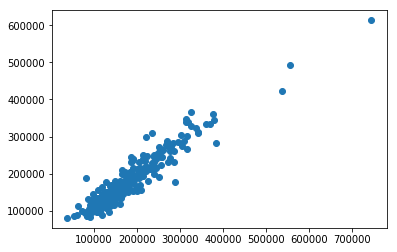

In [9]:
#Principal Component Analysis
xts=pd.DataFrame(X_train_scaled,index=X_train.index)
pca = PCA(n_components=10)

X_transformed = pd.DataFrame(pca.fit_transform(xts),index=xts.index,columns= ['pc1', 'pc2','pc3', 'pc4','pc5','pc6', 'pc7','pc8', 'pc9','pc10'])
#a=list(pca.explained_variance_.round(2))
y_train1=pd.DataFrame(y_train)
a1=pd.concat([y_train,X_transformed],axis=1)
#print(a1)
xtts=pd.DataFrame(X_test_scaled,index=X_test.index)
X_test_transformed = pd.DataFrame(pca.transform(xtts),index=xtts.index,columns= ['pc1', 'pc2','pc3', 'pc4','pc5','pc6', 'pc7','pc8', 'pc9','pc10'])

r_model=RandomForestRegressor(random_state=1,n_estimators=1000)
r_model.fit(X_transformed,y_train)
y_hat=r_model.predict(X_test_transformed)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))
#print(list(zip(y_test,y_hat)))


xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
xgb.fit(X_transformed,y_train)
y_hat = xgb.predict(X_test_transformed)
print("Root mean squared error",np.sqrt(mean_squared_error(y_hat,y_test)))
print("R squared",r2_score(y_test,y_hat))
plt.scatter(y_test,y_hat)

In [10]:
df=pd.read_csv('C:/Users/Nandhini Giridharan/Downloads/train.csv')


#Iteration 4. Capping predicted outliers
print("Actual min & max:", Y.min(),"   ",Y.max())
m1=Y.min()
m2=Y.max()

#Onehot Encoding categorical variables
Y=df['SalePrice']
cat_columns=list((df.select_dtypes([object]).columns))
X1 = pd.get_dummies(df, prefix_sep="_",columns=cat_columns)
X=X1.drop(['SalePrice'],axis=1)
X=X.select_dtypes([np.number])
for col in X.columns:
    X[col].fillna(X[col].median(axis=0),inplace=True)

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2)
scalar=preprocessing.StandardScaler().fit(X_train)

X_train_scaled=scalar.transform(X_train)
X_test_scaled=scalar.transform(X_test)

#Random Forest Model
r_model=RandomForestRegressor(random_state=1,n_estimators=1000)
y_hat1 = cross_val_predict(r_model, X, Y, cv=5)
y_hat= [m1 if x<m1 else m2 if x>m2 else x for x in y_hat1]
print("Random Forest Root mean squared error",np.sqrt(mean_squared_error(y_hat1,Y)))
print("Random Forest R squared",r2_score(Y,y_hat1))
#print("RF predicted min & max:", y_hat.min(),"   ",y_hat.max())

#Linear Regression
r_model=LinearRegression()
y_hat2 = cross_val_predict(r_model, X, Y, cv=5)
y_hat2= [m1 if x<m1 else m2 if x>m2 else x for x in y_hat2]
print("LR Root mean squared error",np.sqrt(mean_squared_error(y_hat2,Y)))
print("LR R squared",r2_score(Y,y_hat2))
print("LR predicted min & max:", min(y_hat2),"   ",max(y_hat2))

#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
y_hat3 = cross_val_predict(xgb, X, Y, cv=5)
y_hat3= [m1 if x<m1 else m2 if x>m2 else x for x in y_hat3]
print("XGB Root mean squared error",np.sqrt(mean_squared_error(y_hat3,Y)))
print("XGB R squared",r2_score(Y,y_hat3))
print("XGB predicted min & max:", min(y_hat3),"   ",max(y_hat3))


#Neural Network
regressor = MLPRegressor(hidden_layer_sizes = (100,75,50, 25,5), activation = 'relu', solver = 'adam', alpha = .0001, random_state = 1)

X2=pd.DataFrame(X).fillna(0)
X2=X2.replace([np.inf, -np.inf], 0)
y_hat4 = cross_val_predict(regressor, X2, Y, cv=5)
y_hat4= [m1 if x<m1 else m2 if x>m2 else x for x in y_hat4]
print("NN Root mean squared error",np.sqrt(mean_squared_error(y_hat4,Y)))
print("NN R squared",r2_score(Y,y_hat4))
print("NN predicted min & max:", min(y_hat4),"   ",max(y_hat4))


#KNN regression
kmodel = neighbors.KNeighborsRegressor(n_neighbors = 10)
y_hat5 = cross_val_predict(kmodel, X, Y, cv=5)
y_hat5= [m1 if x<m1 else m2 if x>m2 else x for x in y_hat5]
print("KNN Root mean squared error",np.sqrt(mean_squared_error(y_hat5,Y)))
print("KNN R squared",r2_score(Y,y_hat5))
print("KNN predicted min & max:", min(y_hat5),"   ",max(y_hat5))

final_y_hat=(y_hat1+y_hat2+y_hat3+y_hat4+y_hat5)/5


print("Root mean squared error",np.sqrt(mean_squared_error(final_y_hat,Y)))
print("R squared",r2_score(Y,final_y_hat))

print(min(final_y_hat),max(final_y_hat))

Actual min & max: 34900     755000


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


Random Forest Root mean squared error 30256.897199665564
Random Forest R squared 0.8548421568660485
LR Root mean squared error 35230.78495962207
LR R squared 0.8031948919685583
LR predicted min & max: 34900     755000
[12:14:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:14:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB Root mean squared error 28178.79685006751
XGB R squared 0.8740968432393716
XGB predicted min & max: 51797.62     602778.5


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimi

NN Root mean squared error 41219.09832437177
NN R squared 0.7306055144101318
NN predicted min & max: 34900     755000
KNN Root mean squared error 47285.03762940413
KNN R squared 0.64548125351655
KNN predicted min & max: 82530.0     424927.5
Root mean squared error 30506.67286875476
R squared 0.8524356608872004
56232.86472410909 513428.30714999995


In [11]:
#Modeling of models:

f_data=pd.DataFrame(zip(y_hat1,y_hat2,y_hat3,y_hat4,y_hat5),columns=["RF","LR","XGB","NN","KNN"])
#print(f_data.head(10))
#print(Y.head(10))
f_model=LinearRegression()
f_model.fit(f_data, Y)
f_hat=f_model.predict(f_data)
f_hat= [m1 if x<m1 else m2 if x>m2 else x for x in f_hat]
print("LR Root mean squared error",np.sqrt(mean_squared_error(f_hat,Y)))
print("LR R squared",r2_score(Y,f_hat))
print("LR predicted min & max:", min(f_hat),"   ",max(f_hat))
x= list(np.round(f_model.coef_,2))
col1= list(f_data.columns)
print(list(zip(col1,x)))


LR Root mean squared error 27128.443974963346
LR R squared 0.8833078891827219
LR predicted min & max: 46604.36199500665     598809.2584931433
[('RF', 0.0), ('LR', 0.24), ('XGB', 0.78), ('NN', -0.06), ('KNN', 0.1)]


In [12]:
print(max(y_hat))

562393.048


In [ ]:
print("First iteration:\nOnly Continuous variables, everything scaled\nLinear Regression:0.84\nRandomForest:.88\nXGB:.89")
print("\n\nSecond iteration:\nCatergorical variables one hot encoding, everything scaled\nLinear Regression:0.84\nRandomForest:.88\nXGB:.90")

In [ ]:
#Preferred model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
scalar=preprocessing.StandardScaler().fit(X)
X_t_scaled=scalar.transform(X)
xgb.fit(X_t_scaled,Y)

#Reading test set
val_df=pd.read_csv("C:/Users/Nandhini Giridharan/Downloads/test.csv")

#Categorical variable treatment - One hot encoding
X1 = pd.get_dummies(val_df, prefix_sep="_",columns=cat_columns)
X=X1.select_dtypes([np.number])
for col in X.columns:
    X[col].fillna(X[col].median(axis=0),inplace=True)

#Replacing columns with 0, if found missing in the test set    
extra_cols=list(set(list(X_train.columns))-set(list(X.columns)))
for d in extra_cols:
    X[d]=0
    
#Scaling test set
X_scaled=scalar.transform(X)
y_hat = xgb.predict(X_scaled)
y_hat= [m1 if x<m1 else m2 if x>m2 else x for x in y_hat]
result=pd.DataFrame(X['Id']).join(pd.DataFrame(y_hat,columns=["SalePrice"]))
result.to_csv('C:/Users/Nandhini Giridharan/Downloads/submission.csv')

In [18]:
#Preferred model
#Training set
Y=df['SalePrice']
cat_columns=list((df.select_dtypes([object]).columns))
X1 = pd.get_dummies(df, prefix_sep="_",columns=cat_columns)
X=X1.drop(['SalePrice'],axis=1)
X=X.select_dtypes([np.number])
for col in X.columns:
    X[col].fillna(X[col].median(axis=0),inplace=True)

#Scaling
scalar=preprocessing.StandardScaler().fit(X)
xts=scalar.transform(X)

xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)



m1=Y.min()
m2=Y.max()

#Reading test set
val_df=pd.read_csv("C:/Users/Nandhini Giridharan/Downloads/test.csv")

#Categorical variable treatment - One hot encoding
X1 = pd.get_dummies(val_df, prefix_sep="_",columns=cat_columns)
X=X1.select_dtypes([np.number])
for col in X.columns:
    X[col].fillna(X[col].median(axis=0),inplace=True)

#Replacing columns with 0, if found missing in the test set    
extra_cols=list(set(list(X_train.columns))-set(list(X.columns)))
for d in extra_cols:
    X[d]=0

#Scaling test set
scalar=preprocessing.StandardScaler().fit(X)
#xts=scalar.transform(X)
X_scaled=scalar.transform(X)

#PCA transformation
pca = PCA(n_components=10)
X_transformed = pd.DataFrame(pca.fit_transform(xts),columns= ['pc1', 'pc2','pc3', 'pc4','pc5','pc6', 'pc7','pc8', 'pc9','pc10'])
xgb.fit(X_transformed,Y)


xtts=pd.DataFrame(X_scaled,index=X.index)
X_test_transformed = pd.DataFrame(pca.fit_transform(xtts),columns= ['pc1', 'pc2','pc3', 'pc4','pc5','pc6', 'pc7','pc8', 'pc9','pc10'])


#Apply Random Forest model
r_model=RandomForestRegressor(random_state=1,n_estimators=1000)
#r_model.fit(X_transformed,Y)
#y_hat=r_model.predict(X_test_transformed)

y_hat = xgb.predict(X_test_transformed)
y_hat= [m1 if x<m1 else m2 if x>m2 else x for x in y_hat]
result=pd.DataFrame(X['Id']).join(pd.DataFrame(y_hat,columns=["SalePrice"]))



y_hat= [m1 if x<m1 else m2 if x>m2 else x for x in y_hat]
result=pd.DataFrame(X['Id']).join(pd.DataFrame(y_hat,columns=["SalePrice"]))
result.to_csv('C:/Users/Nandhini Giridharan/Downloads/submission.csv',index = False)


C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
C:\Users\Nandhini Giridharan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base

[11:53:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [16]:
print(X_test_transformed)

           pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    -3.358274 -3.194700 -1.500073  0.435279 -2.112624  0.289344 -0.141197   
1    -0.920257 -4.647055  1.513579 -1.094477 -2.010772 -1.784916 -0.887350   
2     2.229135  0.646669 -2.721852 -2.408736  0.789559  0.456259  0.871615   
3     3.427930  1.122485 -1.820964 -2.337974  0.132440 -0.392892  0.806700   
4     2.939601 -0.146697 -1.864800  3.263523  1.085521  0.329265  0.736576   
5     1.306132  0.745996 -2.862583 -3.395960  0.995647 -0.143263 -0.590093   
6     1.126125 -2.191001 -2.366864 -1.172265 -0.137979  0.838304  0.993250   
7     1.863127  2.109847 -2.606920 -2.399717 -0.080699  0.112975 -0.072197   
8     1.483093 -1.932364 -1.734014  0.478604 -0.388793  1.219557  0.834676   
9    -2.576979 -5.000317 -1.702863  0.456955 -0.895863  1.321114 -0.516875   
10    2.673597 -0.618703 -2.578330  4.010362  1.561627  1.333417  1.373144   
11   -3.662626  0.024990 -5.000147  2.993305  3.127023 -4.634855